In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
import warnings
warnings.filterwarnings('ignore')

In [35]:
df = pd.read_csv('EasyVisa.csv')
df.head(2)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified


In [36]:
df.shape

(25480, 12)

In [37]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [39]:
numeric_feature = [feature for feature in df.columns if df[feature].dtype != 'O']

categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']

print(numeric_feature)
print(categorical_feature)

['no_of_employees', 'yr_of_estab', 'prevailing_wage']
['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [40]:
for col in categorical_feature:
    print(df[col].value_counts(normalize=True) * 100)
    print("----------------------------------")

case_id
EZYV01       0.003925
EZYV02       0.003925
EZYV03       0.003925
EZYV04       0.003925
EZYV05       0.003925
               ...   
EZYV25476    0.003925
EZYV25477    0.003925
EZYV25478    0.003925
EZYV25479    0.003925
EZYV25480    0.003925
Name: proportion, Length: 25480, dtype: float64
----------------------------------
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
----------------------------------
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
----------------------------------
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
----------------------------------
requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64
----------------------------------


#### Univariate Analysis

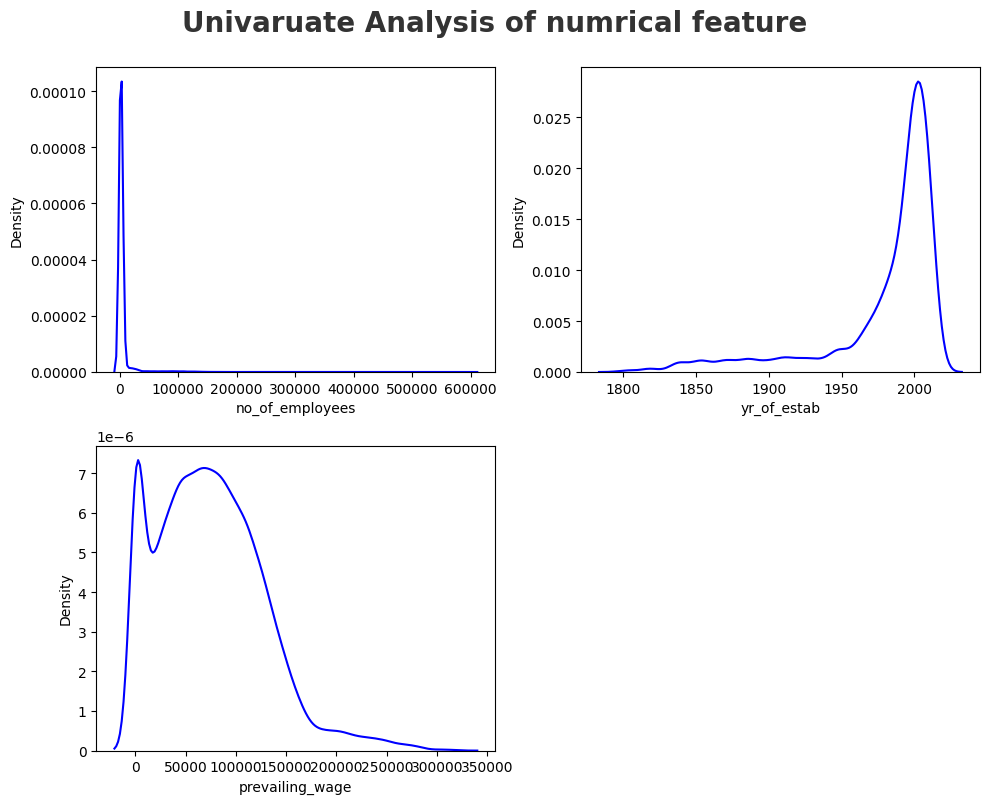

In [41]:
plt.figure(figsize=(10, 8))
plt.suptitle('Univaruate Analysis of numrical feature', fontsize=20, fontweight='bold', alpha=.8, y=1.)

for i in range(0, len(numeric_feature)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=df[numeric_feature[i]], color='blue')
    plt.xlabel(numeric_feature[i])
    plt.tight_layout()

In [42]:
categorical_feature.remove('case_id')

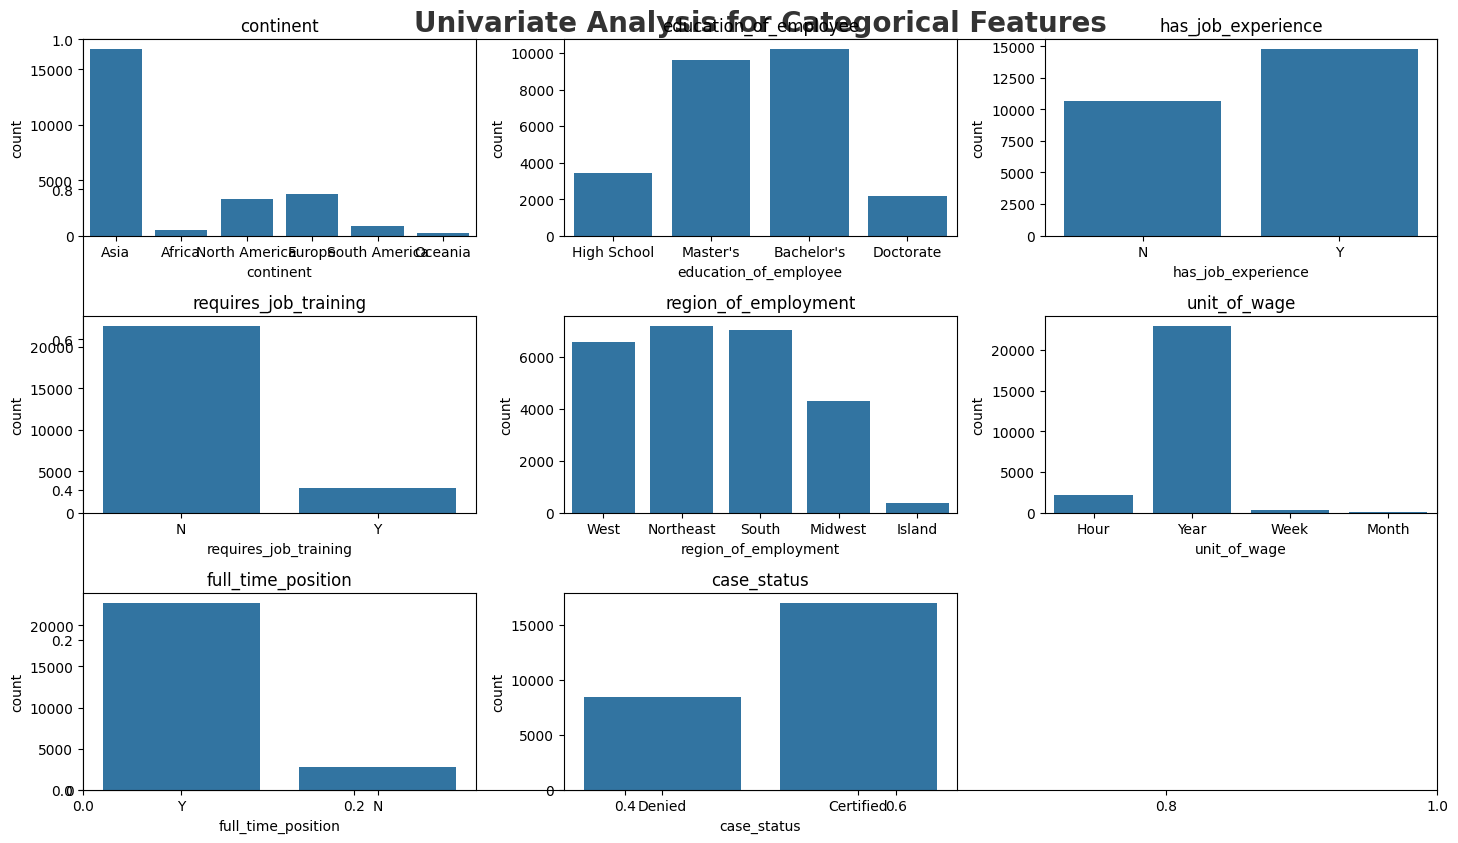

In [43]:
plt.figure(figsize=(15, 9))
plt.title('Univariate Analysis for Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical_feature)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=df[categorical_feature[i]])
    plt.title(categorical_feature[i])
    plt.tight_layout()

#### Multivariate Analysis

In [44]:
discrete_feature = [feature for feature in numeric_feature if len(df[feature].unique()) <= 25]

continuous_feature = [feature for feature in numeric_feature if len(df[feature].unique()) > 25]

print('We have {} discrete features : {}'.format(len(discrete_feature), discrete_feature))
print('\nWe have {} continuous_features : {}'.format(len(continuous_feature), continuous_feature))

We have 0 discrete features : []

We have 3 continuous_features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


#### Check Multicollinearity for Categorical features

In [45]:
from scipy.stats import chi2_contingency

chi2_test = []
for feature in categorical_feature:
    if chi2_contingency(pd.crosstab(df['case_status'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Accept Hypothesis')

result = pd.DataFrame(data=[categorical_feature, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,continent,Reject Null Hypothesis
1,education_of_employee,Reject Null Hypothesis
2,has_job_experience,Reject Null Hypothesis
3,requires_job_training,Accept Hypothesis
4,region_of_employment,Reject Null Hypothesis
5,unit_of_wage,Reject Null Hypothesis
6,full_time_position,Reject Null Hypothesis
7,case_status,Reject Null Hypothesis


#### Checking Null Values

In [46]:
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

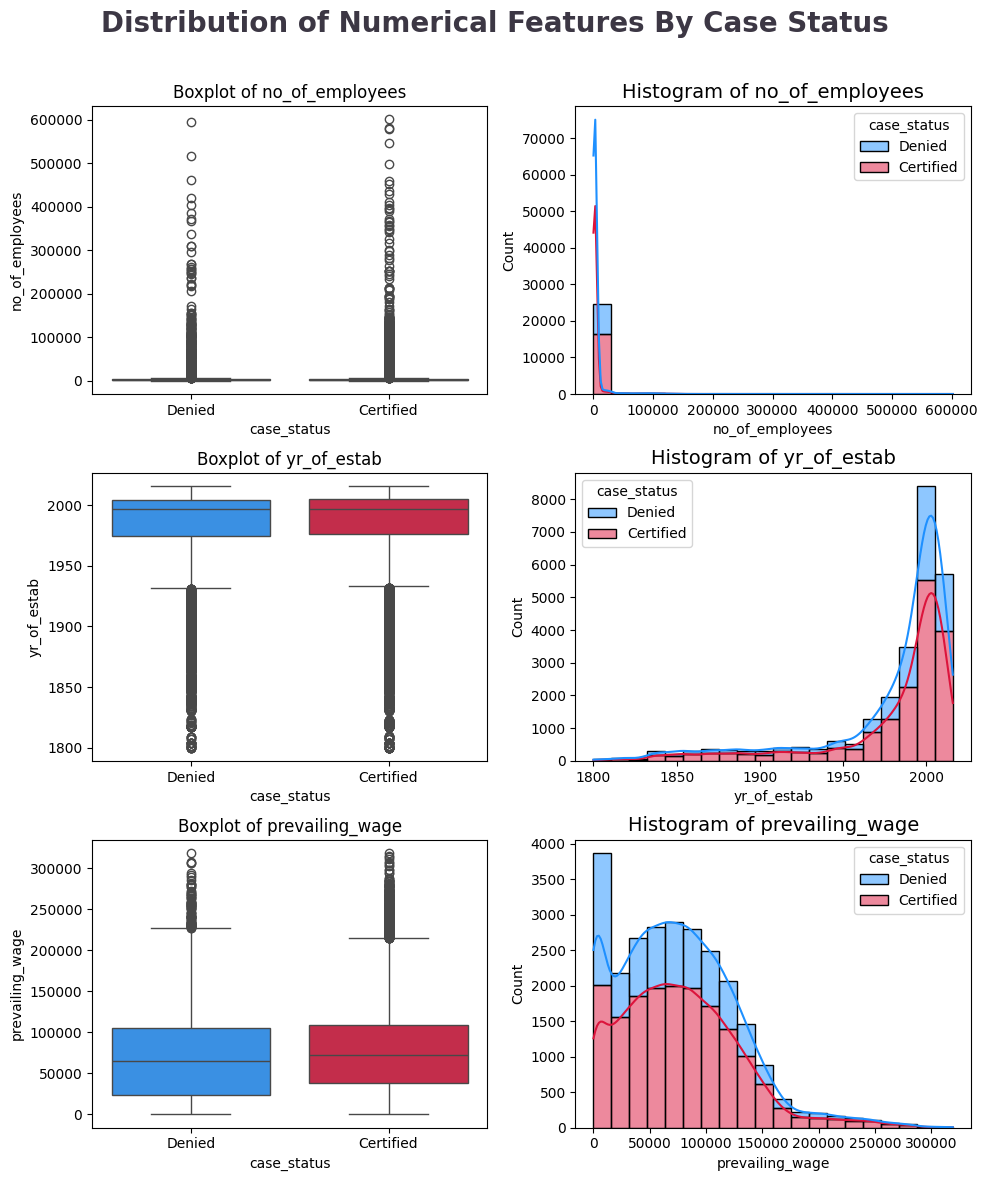

In [47]:
clr1 = ['#1E90FF', '#DC143C']
fig, ax = plt.subplots(3, 2, figsize=(10, 12))
fig.suptitle('Distribution of Numerical Features By Case Status', color='#3C3744',
             fontsize=20, fontweight='bold', ha='center')

for i, col in enumerate(continuous_feature):
    sns.boxplot(data=df, x='case_status', y=col, palette=clr1, ax=ax[i, 0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)
    
    sns.histplot(data=df, x=col, hue='case_status', bins=20, kde=True, multiple='stack', palette=clr1, ax=ax[i, 1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=14)
    
fig.tight_layout()
fig.subplots_adjust(top=.90)